In [1]:
# ignore warnings
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# read Iris data from pydatset
titanic = pd.read_csv('titanic.csv')

titanic

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [2]:
dummy_df=pd.get_dummies(titanic.sex,dummy_na=False, drop_first=[True])
titanic=pd.concat([titanic ,dummy_df],axis=1)

In [3]:
titanic.drop(columns=['sex','deck','embarked','class','embark_town','age','Unnamed: 0','passenger_id'],inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
target='survived'
def train_validate_test_split(titanic, target,seed=123):

    train_validate, test = train_test_split(titanic, test_size=0.2, 
                                            random_state=seed,
                                            stratify=titanic[target])
    train, validate = train_test_split(train_validate, test_size=0.3,
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [5]:
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic, target='survived', seed=123) 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [6]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train, y_train)

[Text(0.5, 0.875, 'male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(0.125, 0.375, 'fare <= 28.856\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(0.0625, 0.125, 'gini = 0.133\nsamples = 42\nvalue = [3, 39]'),
 Text(0.1875, 0.125, 'gini = 0.038\nsamples = 52\nvalue = [1, 51]'),
 Text(0.375, 0.375, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]'),
 Text(0.3125, 0.125, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]'),
 Text(0.4375, 0.125, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.75, 0.625, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]'),
 Text(0.625, 0.375, 'parch <= 0.5\ngini = 0.184\nsamples = 205\nvalue = [184, 21]'),
 Text(0.5625, 0.125, 'gini = 0.173\nsamples = 199\nvalue = [180, 19]'),
 Text(0.6875, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.875, 0.375, 'fare <= 19.637\ngini = 0.43\nsamples = 118\nvalue = [81

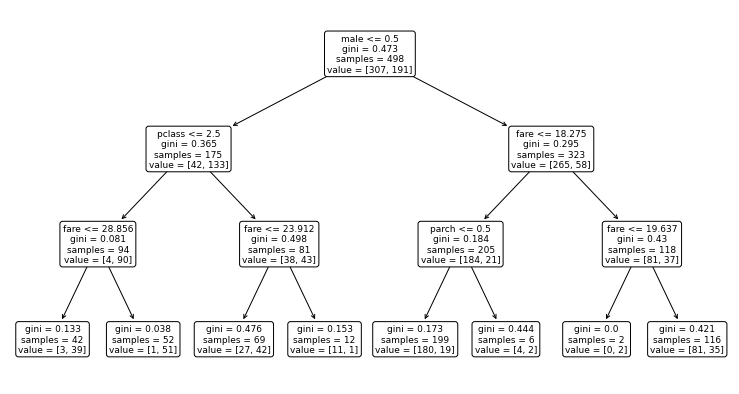

In [7]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, rounded=True)

In [8]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [9]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.69827586, 0.30172414],
       [0.69827586, 0.30172414],
       [0.69827586, 0.30172414],
       [0.07142857, 0.92857143],
       [0.01923077, 0.98076923]])

In [10]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


In [11]:
confusion_matrix(y_train, y_pred)

array([[276,  31],
       [ 57, 134]])

In [12]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [13]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=['actual_notsurvived','acutal_survived'], columns=['prep_notsurvived','prep_survived'])

,prep_notsurvived,prep_survived
actual_notsurvived,276,31
acutal_survived,57,134


In [14]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.81      0.70      0.75       191

    accuracy                           0.82       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



In [15]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [16]:
y_pred = clf.predict(X_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       132
           1       0.76      0.65      0.70        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.78      0.79      0.78       214



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [21]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [26]:
print(confusion_matrix(y_train, y_pred))

[[300   7]
 [ 23 168]]


In [23]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       307
           1       0.96      0.88      0.92       191

    accuracy                           0.94       498
   macro avg       0.94      0.93      0.94       498
weighted avg       0.94      0.94      0.94       498



In [25]:
print('Accuracy of random forest classifier on train set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on train set: 0.94
